# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [90]:
# initial imports
import os
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd

%matplotlib inline

In [91]:
# Read the Mapbox API key
path="C:\\Users\\James McClure\\.env"
load_dotenv(dotenv_path=path)
mapbox_token = os.getenv("MapBox_API_Public")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [92]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col='year')
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [93]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
units_year_df = (
    sfo_data['housing_units'].groupby([sfo_data.index]).mean()
)
units_year_df

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [108]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
units_year_df.hvplot(kind='bar', ylim=[370000,390000])

:Bars   [year]   (housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [95]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!
avg_rent_year = (
    sfo_data['gross_rent'].groupby([sfo_data.index]).mean()
)
avg_sale_year = (
    sfo_data['sale_price_sqr_foot'].groupby([sfo_data.index]).mean()
)

avg_sale_year

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [109]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
avg_rent_year.hvplot(kind='line')

:Curve   [year]   (gross_rent)

### Average Sales Price per Year

In [110]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
avg_sale_year.hvplot(kind='line')

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [98]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
year_neighborhood_df = (
    sfo_data[['neighborhood','sale_price_sqr_foot']]
    .groupby([sfo_data.index,'neighborhood'])
    .mean()
)
year_neighborhood_df

sale_price_sqr_foot
year neighborhood                                      
2010 Alamo Square                            291.182945
     Anza Vista                              267.932583
     Bayview                                 170.098665
     Buena Vista Park                        347.394919
     Central Richmond                        319.027623
     Central Sunset                          418.172493
     Corona Heights                          369.359338
     Cow Hollow                              569.379968
     Croker Amazon                           165.645730
     Diamond Heights                         456.930822
     Downtown                                241.804552
     Eureka Valley/Dolores Heights           403.118313
     Excelsior                               364.928336
     Financial District North                401.749967
     Financial District South                162.821210
     Forest Knolls                           209.049327
     Glen Park                               715.586438
     Golden Gate Heights                     551.801119
     Haight Ashbury                          254.473779
     Hayes Valley                            272.284980
     Hunters Point                           170.624920
     Ingleside                               275.056686
     Inner Mission                           238.350020
     Inner Parkside                          199.702004
     Inner Richmond                          285.822358
     Inner Sunset                            275.769730
     Jordan Park/Laurel Heights              419.887812
     Lake --The Presidio                     320.796910
     Lone Mountain                           398.458876
     Lower Pacific Heights                   374.057636
...                                                 ...
2016 Inner Mission                           647.770447
     Inner Parkside                          518.112650
     Inner Richmond                          403.311132
     Inner Sunset                            445.923828
     Jordan Park/Laurel Heights              704.566419
     Lower Pacific Heights                   636.430770
     Marina                                  431.944602
     Merced Heights                         1416.666667
     Mission Bay                             924.569116
     Mission Terrace                         879.017013
     Nob Hill                                777.008315
     Noe Valley                              799.495651
     North Beach                             407.553322
     Outer Mission                            40.772625
     Outer Parkside                          732.720684
     Outer Richmond                         1196.645437
     Outer Sunset                            510.576907
     Pacific Heights                         996.389364
     Park North                              211.301370
     Parnassus/Ashbury Heights              1207.997485
     Potrero Hill                            707.651609
     Presidio Heights                       1465.968586
     Russian Hill                           1024.339877
     South of Market                         531.136374
     Sunnyside                               751.173709
     Telegraph Hill                          903.049771
     Twin Peaks                              970.085470
     Van Ness/ Civic Center                  552.602567
     Visitacion Valley                       328.319007
     Westwood Park                           631.195426

[397 rows x 1 columns]

In [99]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
year_neighborhood_df.hvplot(groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [100]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
neighborhood_df = (
    sfo_data[['neighborhood','sale_price_sqr_foot']]
    .groupby('neighborhood')
    .mean()
    .sort_values('sale_price_sqr_foot',ascending=False)
)
most_expensive =  neighborhood_df.nlargest(10, 'sale_price_sqr_foot')
most_expensive

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [101]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
most_expensive.hvplot(kind='bar', ylim=[610,930])

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

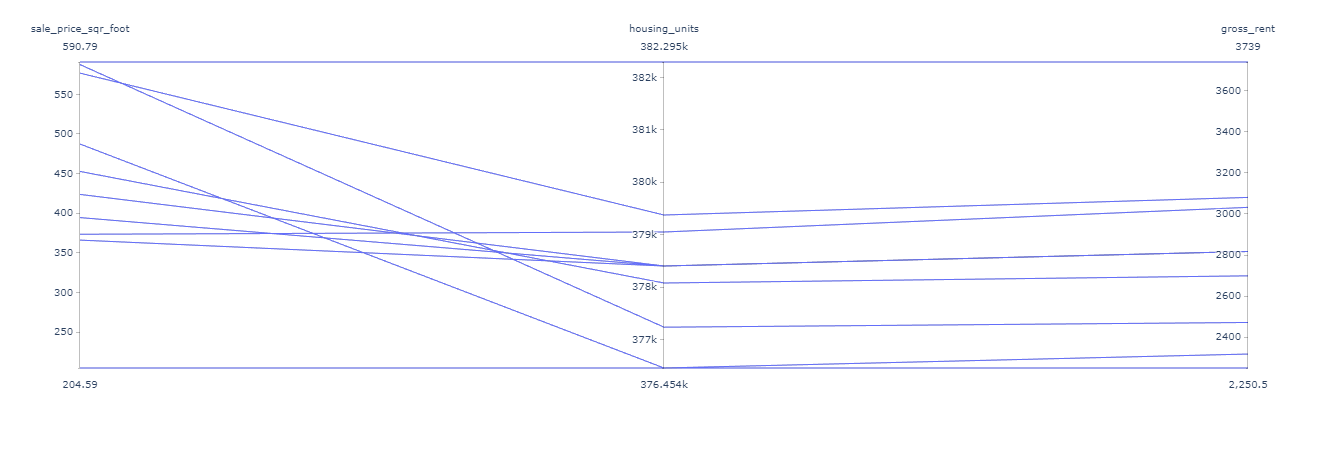

In [102]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
px.parallel_coordinates(sfo_data.groupby(['neighborhood']).mean().reset_index().head(10))

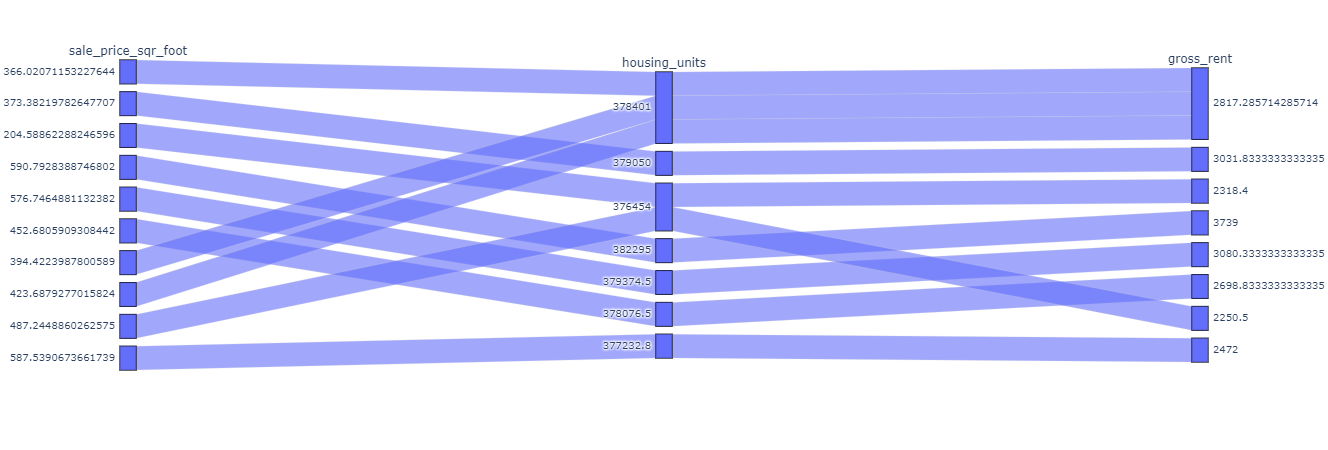

In [103]:
px.parallel_categories(sfo_data.groupby(['neighborhood']).mean().head(10))

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [104]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path,index_col='Neighborhood')
df_neighborhood_locations

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
Buena Vista Park,37.768160,-122.439330
Central Richmond,37.777890,-122.445170
Central Sunset,37.749610,-122.489990
Clarendon Heights,37.753310,-122.447030


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [105]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!


In [106]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
loc_sales = pd.concat([neighborhood_df,df_neighborhood_locations], axis=1, sort=True)
# loc_sales.isnull().count
loc_sales.dropna(inplace=True)
loc_sales.reset_index()
loc_sales

,sale_price_sqr_foot,Lat,Lon
Alamo Square,366.020712,37.791012,-122.402100
Anza Vista,373.382198,37.779598,-122.443451
Bayview,204.588623,37.734670,-122.401060
Bayview Heights,590.792839,37.728740,-122.410980
Buena Vista Park,452.680591,37.768160,-122.439330
Central Richmond,394.422399,37.777890,-122.445170
Central Sunset,423.687928,37.749610,-122.489990
Clarendon Heights,487.244886,37.753310,-122.447030
Corona Heights,587.539067,37.785530,-122.456000
Cow Hollow,665.964042,37.792980,-122.435790


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

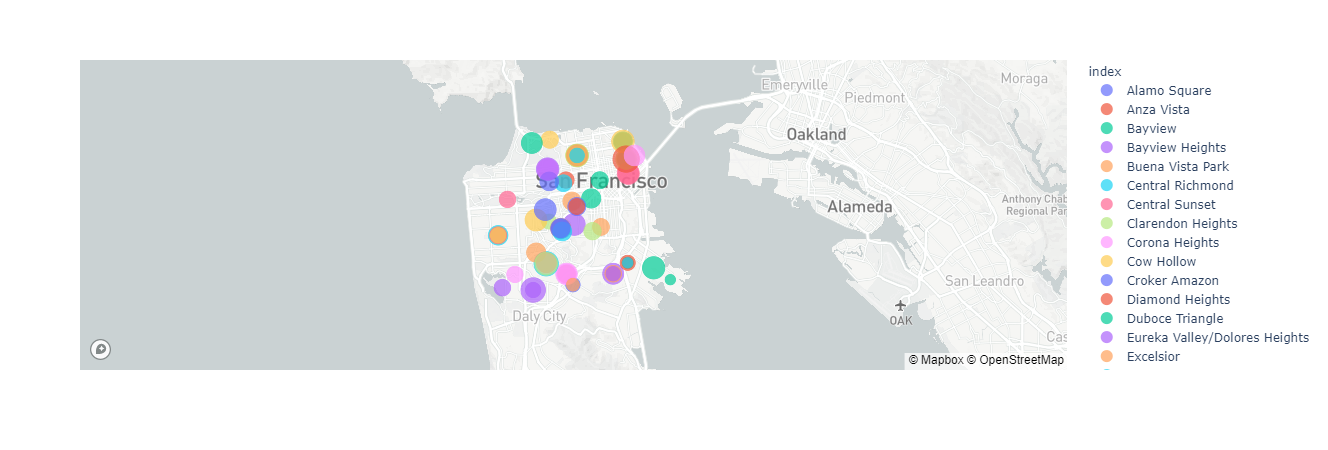

In [107]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
map = px.scatter_mapbox(
    loc_sales,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color=loc_sales.index,
    zoom=10
)

# Display the map
map.show()